# CSE 587 - Lab 1 - Part 2
## By Dipack P Panjabi, 50291077, dipackpr@buffalo.edu

## Chart One
### Influenza Positive Tests reported to CDC

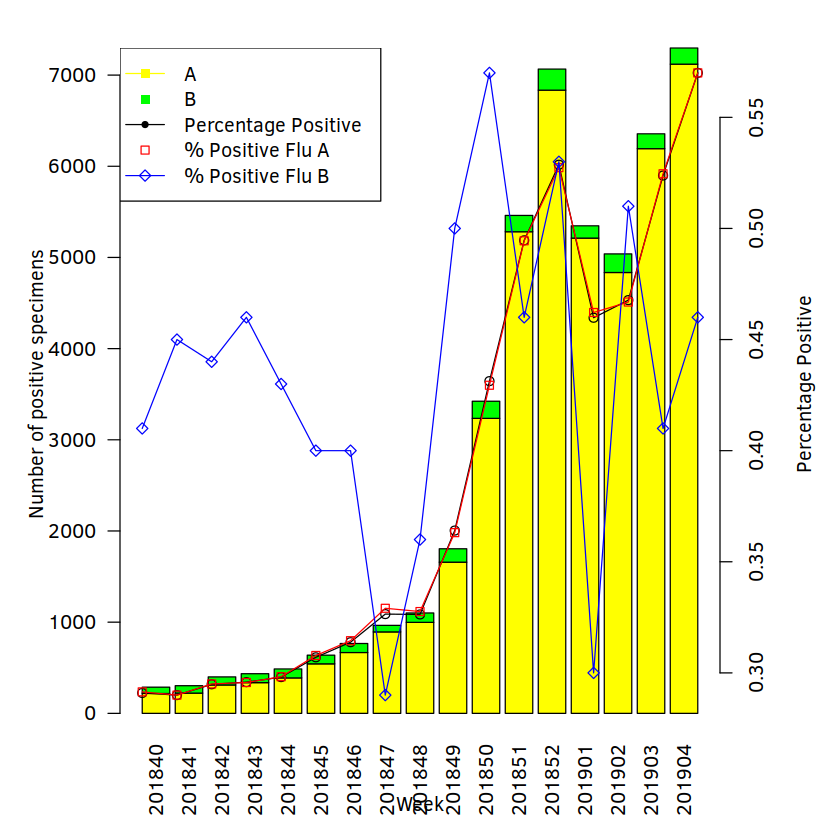

In [1]:
natSummaryFlu <- read.table("./1-nat-summary-flu.tsv", header = T)
relevant <- natSummaryFlu[1:nrow(natSummaryFlu) - 1, ]
weeks <- relevant$Week

totalAB <- cbind(relevant$TotalA, relevant$TotalB)

par(mar = c(5,5,2,5))
with(relevant, 
     barplot(t(as.matrix(totalAB)),
             xlab = "Week",
             ylab = "Number of positive specimens",
            col = c("yellow", "green"),
            names.arg = Week,
            las = 2))

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PercentagePositive,
          type = "o",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PercentPositiveA,
          type = "o",
          pch = 22,
          col = "red",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PercentPositiveB,
          type = "o",
          pch = 23,
          col = "blue",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

axis(side = 4)
mtext(side = 4, line = 3, "Percentage Positive")
legend("topleft", 
       legend = c("A", "B", "Percentage Positive", "% Positive Flu A", "% Positive Flu B"),
      col = c("yellow", "green", "black", "red", "blue"),
      lty = c(1, 0),
      pch = c(15, 15, 20, 22, 23))

## Chart Two
### Influenza Positive Tests Reported to CDC

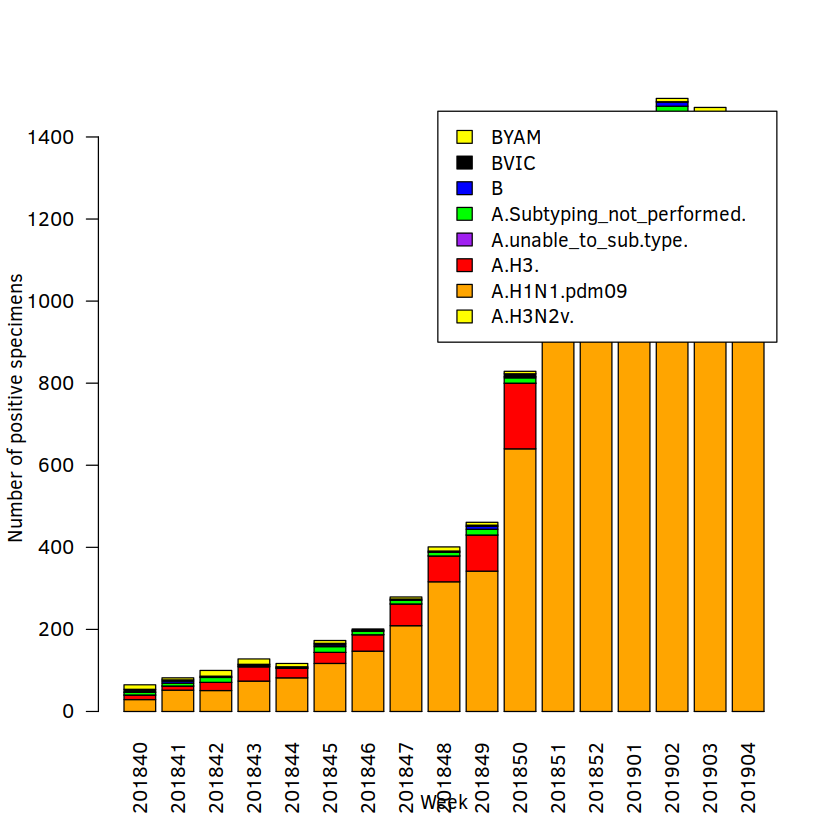

In [2]:
fluPositive <- read.table("./2-flu-positive.tsv", header = T)
relevant <- fluPositive[1:nrow(fluPositive) - 1, ]

weeks <- relevant$Week
fluTypes <- relevant[, 2:9]

barplot(t(as.matrix(fluTypes)), 
        xlab = "Week", 
        ylab = "Number of positive specimens", 
        col = c("yellow", "orange", "red", "purple", "green", "blue", "black"),
        names.arg = weeks,
       legend = TRUE, las = 2, xpd = TRUE)

## Chart Four
### Percentage of visits for Influenza Like Illness (ILI)

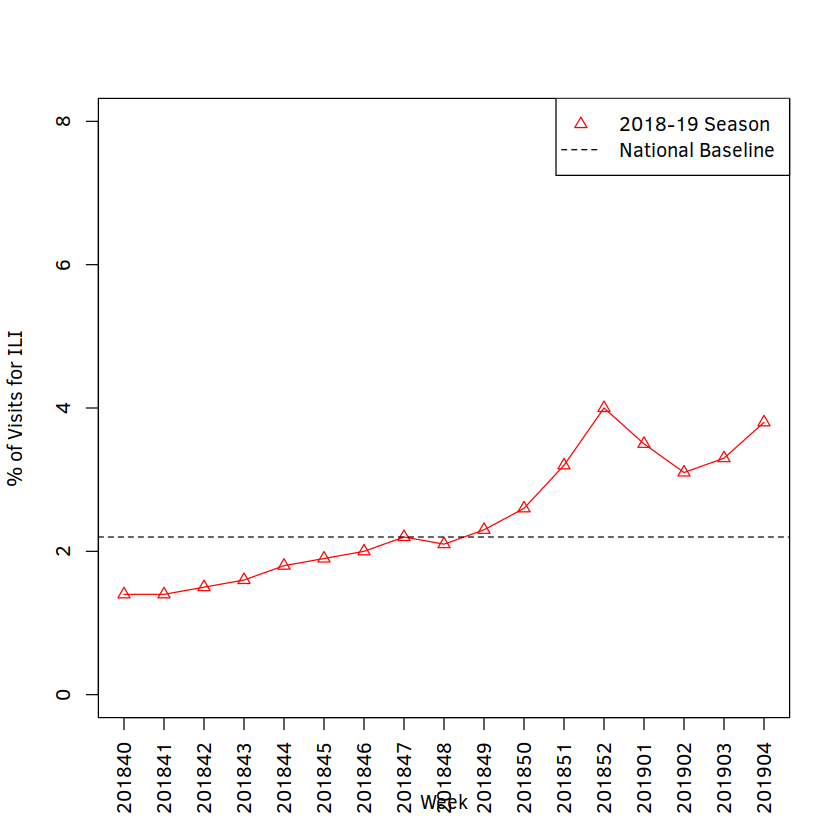

In [3]:
pVisits <- read.table("./4-percentage-visit-ili.tsv", header = TRUE)
pVisits <- pVisits[1:(nrow(pVisits) - 2), ]
weeks <- pVisits$Week
plot(x = c(1:length(weeks)),
     y = pVisits$WeightedILI,
     ylim = c(0.0, 8.0),
     type = "o",
    col = "red",
    pch = 2,
     xlab = "Week",
     ylab = "% of Visits for ILI",
    xaxt = "n")
axis(1, at = 1:length(weeks), labels = weeks, las = 2)
abline(2.2, 0, lty = 2)
legend("topright", 
       legend = c("2018-19 Season", "National Baseline"),
      col = c("red", "black"),
      lty = c(0, 2),
      pch = c(2, NA))

## Chart Five
### Pneumonia and Influenza Mortality

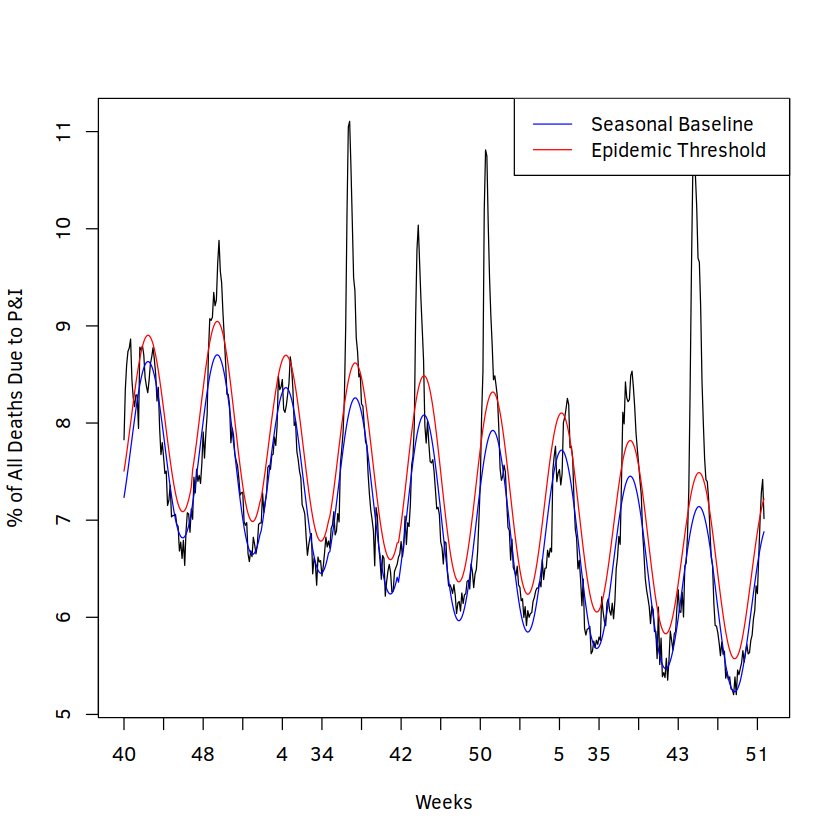

In [4]:
mortality <- read.csv("./5-mortality.csv", header = TRUE)
mortality <- mortality[1:(nrow(mortality) - 1), ]
weeks <- mortality$Week
numWeeks <- length(weeks)
plot(x = c(1:numWeeks),
     y = mortality$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza,
     xlab = "Weeks",
     ylab = "% of All Deaths Due to P&I",
     type = "l",
     col = "black",
     xaxt = "n")
axis(1, at = seq(1, numWeeks, 30), labels = weeks[seq(1, numWeeks, 30)])
lines(x = c(1:numWeeks), y = mortality$Expected, col = "blue")
lines(x = c(1:numWeeks), y = mortality$Threshold, col = "red")
legend("topright", 
       legend = c("Seasonal Baseline", "Epidemic Threshold"),
      col = c("blue", "red"),
      lty = c(1, 1))

## Chart Seven
### 2018-19 Flu Season Severity

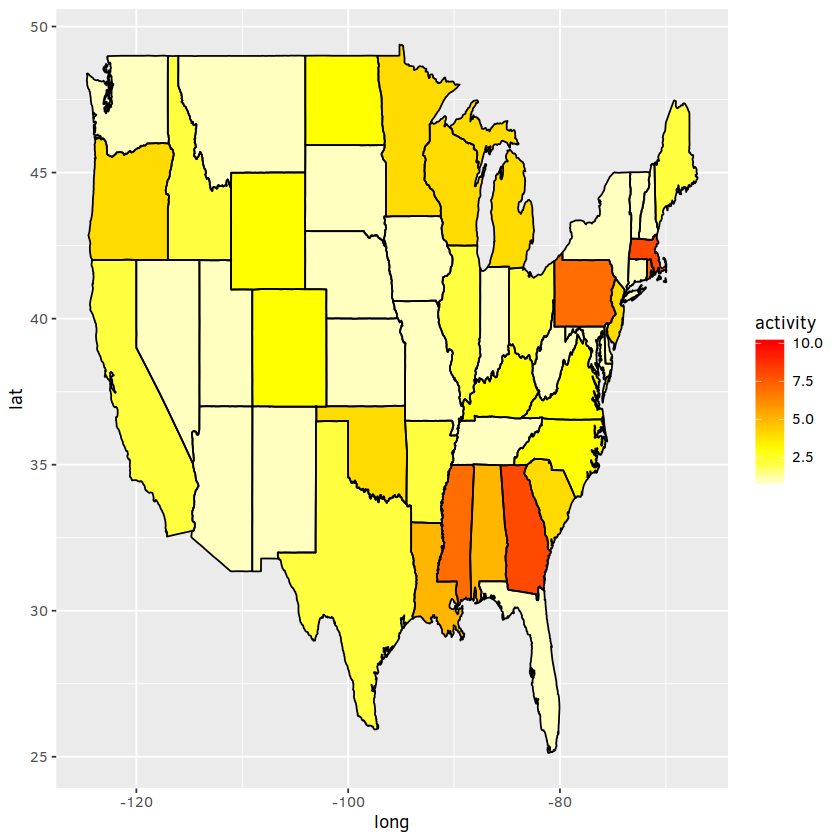

In [5]:
library(ggplot2)

states <- data.frame(read.csv("./6-heatmap.csv", header = TRUE), stringsAsFactors=FALSE)
states <- states[states$WEEKEND != "Feb-02-2019", ]

map_states <- map_data("state")
data <- data.frame(region = tolower(states$STATENAME), activity = states$ACTIVITY.LEVEL)
geo_data <- merge(map_states, data, by = "region")

m <- qplot(long, lat, data = geo_data, geom = "polygon", fill = activity, group = group)
m + geom_path() + scale_fill_gradientn(colours = rev(heat.colors(10)))

# Task 5
Repeating charts one, and two, for yearly data, instead of just the most recent weeks

## Chart One (Yearly Data)
### Influenza Positive Tests reported to CDC

Data is from 2017 Week 40, until 2019 Week 5

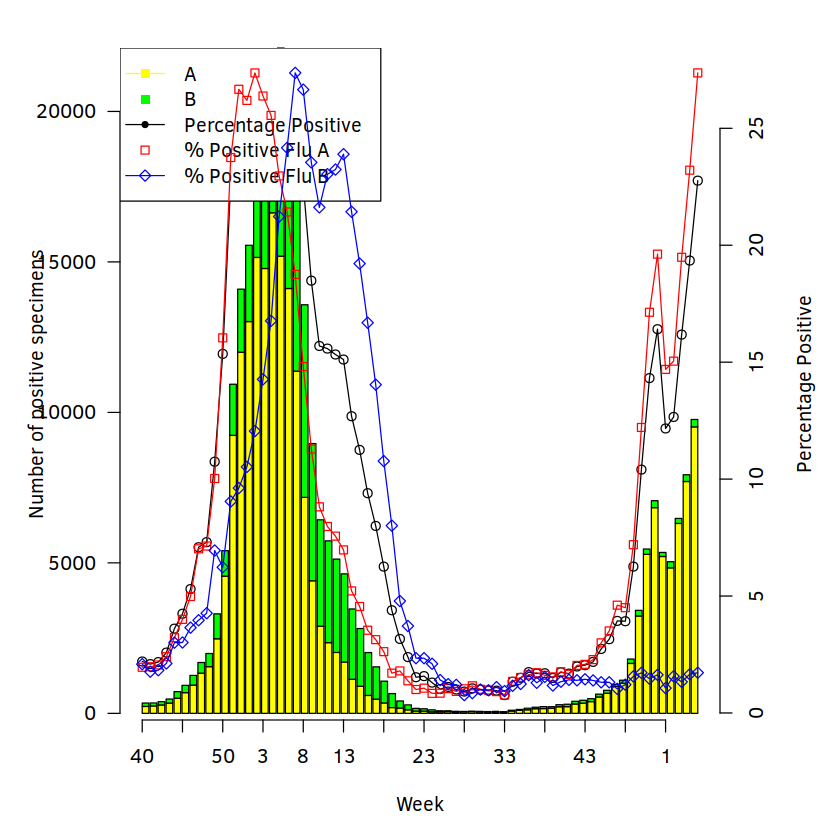

In [6]:
natSummaryFlu <- read.csv("./7-1-nat-summary-flu.csv", header = TRUE)
relevant <- natSummaryFlu[1:nrow(natSummaryFlu) - 1, ]
weeks <- relevant$WEEK
numWeeks <- length(weeks)

totalAB <- cbind(relevant$TOTALA, relevant$TOTALB)

par(mar = c(5,5,2,5))
with(relevant, 
     barplot(t(as.matrix(totalAB)),
             xlab = "Week",
             ylab = "Number of positive specimens",
             col = c("yellow", "green"),
             names.arg = WEEK,
             las = 2,
             xaxt = "n"
            )
    )

par(new = TRUE)
with(relevant,
     plot(x = c(1:length(weeks)),
          y = PERCENTPOSITIVE,
          type = "o",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )
axis(1, at = seq(1, numWeeks, 5), labels = weeks[seq(1, numWeeks, 5)])
axis(side = 4)
mtext(side = 4, line = 3, "Percentage Positive")
legend("topleft", 
       legend = c("A", "B", "Percentage Positive", "% Positive Flu A", "% Positive Flu B"),
      col = c("yellow", "green", "black", "red", "blue"),
      lty = c(1, 0),
      pch = c(15, 15, 20, 22, 23))

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PERCENTA,
          type = "o",
          pch = 22,
          col = "red",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PERCENTB,
          type = "o",
          pch = 23,
          col = "blue",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

## Chart Two (Yearly Data)
### Influenza Positive Tests Reported to CDC

Data is from 2017 Week 40, until 2019 Week 5

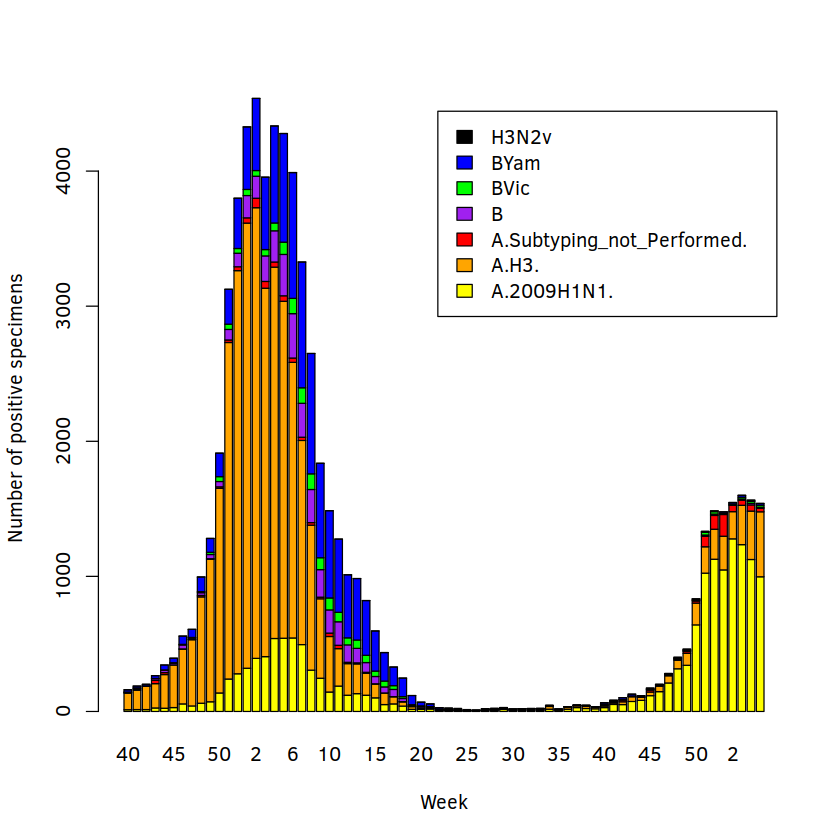

In [7]:
fluPositive <- read.csv("./8-2-flu-positive.csv", header = TRUE)
relevant <- fluPositive[1:nrow(fluPositive) - 1, ]
weeks <- relevant$WEEK
fluTypes <- relevant[, 6:12]

barplot(t(as.matrix(fluTypes)), 
        xlab = "Week", 
        ylab = "Number of positive specimens", 
        col = c("yellow", "orange", "red", "purple", "green", "blue", "black"),
        legend = TRUE,
        names.arg = weeks
        )

# Task 6
### Repeating chart one, just for New York state, using the most recent yearly data for positive influenza cases

Data is from 2017 Week 40, to 2019 Week 5

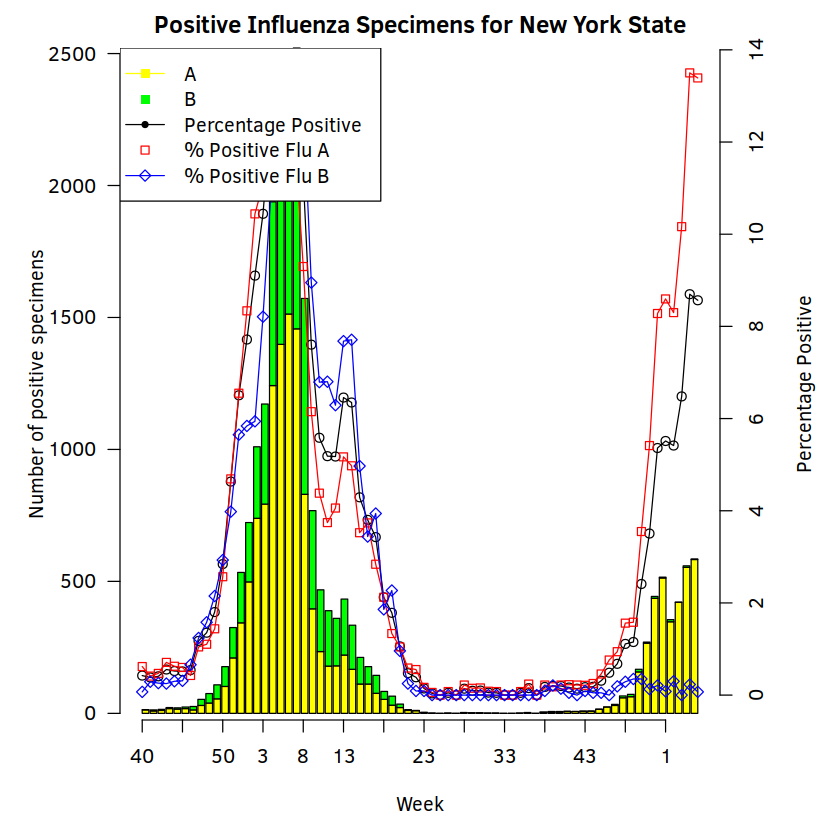

In [8]:
natSummaryFlu <- read.csv("./9-ny-summary-flu.csv", header = TRUE)
relevant <- natSummaryFlu[1:nrow(natSummaryFlu) - 1, ]
weeks <- relevant$WEEK
numWeeks <- length(weeks)

totalAB <- cbind(relevant$TOTALA, relevant$TOTALB)

par(mar = c(5,5,2,5))
with(relevant, 
     barplot(t(as.matrix(totalAB)),
             xlab = "Week",
             ylab = "Number of positive specimens",
            col = c("yellow", "green"),
            names.arg = WEEK,
            las = 2,
            xaxt = "n",
            main = "Positive Influenza Specimens for New York State"
            )
    )

par(new = TRUE)
with(relevant,
     plot(x = c(1:length(weeks)),
          y = PERCENTPOSITIVE,
          type = "o",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PERCENTA,
          type = "o",
          pch = 22,
          col = "red",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

par(new = TRUE)
with(relevant, 
     plot(x = c(1:length(weeks)),
          y = PERCENTB,
          type = "o",
          pch = 23,
          col = "blue",
          xlab = NA,
          ylab = NA,
          axes = FALSE
         )
    )

axis(1, at = seq(1, numWeeks, 5), labels = weeks[seq(1, numWeeks, 5)])
axis(side = 4)
mtext(side = 4, line = 3, "Percentage Positive")
legend("topleft", 
       legend = c("A", "B", "Percentage Positive", "% Positive Flu A", "% Positive Flu B"),
      col = c("yellow", "green", "black", "red", "blue"),
      lty = c(1, 0),
      pch = c(15, 15, 20, 22, 23))